<a href="https://colab.research.google.com/github/alfinmaulani/skripsi/blob/master/combined(w2v).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [100]:
!pip install --upgrade scikit-learn
import numpy as np
import pandas as pd
import io
import os
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
import gensim

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [101]:
url0='https://raw.githubusercontent.com/alfinmaulani/skripsi/master/dataISEAR.csv'
# url1 = 'https://raw.githubusercontent.com/alfinmaulani/skripsi/master/dataisear(preputama).csv'
# url2 = 'tba'
df = pd.read_csv(url0)
# df.iloc[:,1]

In [102]:
df.emosi.value_counts()

joy        1092
sadness    1082
anger      1079
fear       1076
shame      1071
disgust    1066
guilt      1050
Name: emosi, dtype: int64

In [ ]:
df=df.drop(df[df['emosi'] == 'shame'].sample(frac=1).index)
df=df.drop(df[df['emosi'] == 'guilt'].sample(frac=1).index)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [103]:
df2 = pd.read_csv('/content/drive/MyDrive/twitter_prosessed.csv')

preputama : lower case

In [104]:
df['dokumen']=df['dokumen'].str.lower()
# print(df.iloc[4,1])

In [105]:
df2['tweet']=df2['tweet'].str.lower()

preputama : Pembersihan noise (over enter and space)

In [106]:
df=df.replace(' \n', ' ', regex=True)
df=df.replace('   ', ' ', regex=True)
df=df.replace('  ', ' ', regex=True)

In [107]:
df2=df2.replace(' \n', ' ', regex=True)
df2=df2.replace('   ', ' ', regex=True)
df2=df2.replace('  ', ' ', regex=True)

preptambah : expand contractions

In [ ]:
!pip install contractions
import contractions

     |████████████████████████████████| 284 kB 5.1 MB/s 
     |████████████████████████████████| 321 kB 50.8 MB/s 
  Created wheel for pyahocorasick: filename=pyahocorasick-1.4.2-cp37-cp37m-linux_x86_64.whl size=85450 sha256=46d9be3442f36e446d31a08e28702ee7f4d7b57968201514daacf4924d6ce3ba
  Stored in directory: /root/.cache/pip/wheels/25/19/a6/8f363d9939162782bb8439d886469756271abc01f76fbd790f
Successfully built pyahocorasick


In [108]:
df[df['dokumen'].str.contains("couldn't")]

,emosi,dokumen
124,disgust,"when i saw a picture, in the gothenburg post, ..."
526,anger,a friend suggested in a round-about way that t...
545,fear,"i was rock-climbing and absailing & felt ok, b..."
553,anger,"getting a terrible exam mark, which i couldn't..."
673,fear,"after seeing a terror movie at the cinema, i w..."
...,...,...
6589,joy,when my boyfriend came form rumphi to lilongwe...
6592,sadness,i wrote a letter to my boyfriend but he couldn...
6595,guilt,one day i found an incontinent man in the ward...
6624,joy,it was in 1983 september when mce results were...


In [109]:
expanded_words = []    

In [110]:
for word in df.dokumen:
  expanded_words.append(contractions.fix(word))

In [111]:
np.shape(expanded_words)

(7516,)

In [112]:
df.dokumen=expanded_words

In [113]:
df[df['dokumen'].str.contains("couldn't")]

,emosi,dokumen


In [114]:
expanded_words = []
for word in df2.tweet:
  expanded_words.append(contractions.fix(word))

In [115]:
df2.tweet=expanded_words

In [ ]:
df2.head()

,tweet
0,is upset that he cannot update his facebook by...
1,i dived many times for the ball. managed to sa...
2,my whole body feels itchy and like its on fire
3,"no, it is not behaving at all. I am mad. why a..."
4,not the whole crew


preputama : cleansing

In [ ]:
df['dokumen'] = df['dokumen'].str.replace(r'[^\w\s]+', '')

In [ ]:
df2['tweet'] = df2['tweet'].str.replace(r'[^\w\s]+', '')

In [116]:
!pip install tweet-preprocessor
import preprocessor as p

In [117]:
p.set_options(p.OPT.NUMBER)

In [118]:
sementara=[]
for word in df.dokumen:
  sementara.append(p.clean(word))
df.dokumen=sementara

In [119]:
sementara=[]
for word in df2.tweet:
  sementara.append(p.clean(word))
df2.tweet=sementara

In [120]:
df.shape

(7516, 2)

preptambah : remove stopword

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [121]:
pat = r'\b(?:{})\b'.format('|'.join(stop))
df['dokumen'] = df['dokumen'].str.replace(pat, '')
df['dokumen'] = df['dokumen'].str.replace(r'\s+', ' ')

In [122]:
df2['tweet'] = df2['tweet'].str.replace(pat, '')
df2['tweet'] = df2['tweet'].str.replace(r'\s+', ' ')

In [ ]:
df.head()

,emosi,dokumen
0,joy,days feel close partner friends feel peace al...
1,fear,every time imagine someone love could contact ...
2,anger,obviously unjustly treated possibility elucid...
3,sadness,think short time live relate periods life thi...
4,disgust,gathering found involuntarily sitting next tw...


In [ ]:
df.shape

(7516, 2)

preputama : Lemmatization(d laporan salah tkoniize word)

In [123]:
sentences = [word_tokenize(x) for x in df.dokumen] 
# df = pd.DataFrame(df.apply(list,axis=1), columns=['dokumen'])

In [124]:
df.dokumen=sentences

In [125]:
sentences = [word_tokenize(x) for x in df2.tweet] 

In [126]:
df2.tweet=sentences

preptambah : steming (di laporan lematization salah karna lematization = tokenize)

In [ ]:
from nltk.stem.snowball import SnowballStemmer

# Use English stemmer.
stemmer = SnowballStemmer("english")

In [127]:
# temp = df.dokumen.apply(lambda x: [stemmer.stem(y) for y in x])
df['dokumen'].apply(lambda x: [stemmer.stem(y) for y in x])

0       [day, feel, close, partner, friend, ., feel, p...
1       [everi, time, imagin, someon, love, could, con...
2            [obvious, unjust, treat, possibl, elucid, .]
3       [think, short, time, live, relat, period, life...
4       [gather, found, involuntarili, sit, next, two,...
                              ...                        
7511    [two, year, back, someon, invit, tutor, grand-...
7512    [taken, respons, someth, prepar, ., howev, fai...
7513    [home, heard, loud, sound, spit, outsid, door,...
7514    [homework, teacher, ask, us, ., scold, immedi, .]
7515    [shout, younger, brother, alway, afraid, call,...
Name: dokumen, Length: 7516, dtype: object

In [128]:
df2['tweet'].apply(lambda x: [stemmer.stem(y) for y in x])

0          [upset, can, not, updat, facebook, text, ..., ...
1          [dive, mani, time, ball, ., manag, save, %, re...
2                     [whole, bodi, feel, itchi, like, fire]
3              [,, behav, ., i, mad, ., ?, can, not, see, .]
4                                              [whole, crew]
                                 ...                        
1596959                  [woke, ., school, best, feel, ever]
1596960    [thewdb.com, -, cool, hear, old, walt, intervi...
1596961                [readi, mojo, makeov, ?, ask, detail]
1596962    [happi, th, birthday, boo, alll, time, !, !, !...
1596963                                              [happi]
Name: tweet, Length: 1596964, dtype: object

In [ ]:
df2.head()

,tweet
0,"[upset, can, not, update, facebook, texting, m..."
1,"[dived, many, times, ball, managed, save, 50, ..."
2,"[whole, body, feels, itchy, like, fire]"
3,"[behaving, I, mad, can, not, see]"
4,"[whole, crew]"


save df

In [ ]:
# df.to_csv(r'dataisear(preptambah).csv', index = False)

gabung corpus

In [ ]:
df2.tweet

0          [upset, can, not, update, facebook, texting, m...
1          [dived, many, times, ball, managed, save, 50, ...
2                    [whole, body, feels, itchy, like, fire]
3                          [behaving, I, mad, can, not, see]
4                                              [whole, crew]
                                 ...                        
1596959                  [woke, school, best, feeling, ever]
1596960    [thewdbcom, cool, hear, old, walt, interviews, â]
1596961                [ready, mojo, makeover, ask, details]
1596962    [happy, 38th, birthday, boo, alll, time, tupac...
1596963                                              [happy]
Name: tweet, Length: 1596964, dtype: object

In [ ]:
sent=df.dokumen

In [129]:
sent=df2.tweet.append(df.dokumen,ignore_index=True)

In [ ]:
df

,emosi,dokumen
0,joy,"[days, feel, close, partner, friends, feel, pe..."
1,fear,"[every, time, imagine, someone, love, could, c..."
2,anger,"[obviously, unjustly, treated, possibility, el..."
3,sadness,"[think, short, time, live, relate, periods, li..."
4,disgust,"[gathering, found, involuntarily, sitting, nex..."
...,...,...
7511,shame,"[two, years, back, someone, invited, tutor, gr..."
7512,shame,"[taken, responsibility, something, prepared, h..."
7513,fear,"[home, heard, loud, sound, spitting, outside, ..."
7514,guilt,"[homework, teacher, asked, us, scolded, immedi..."


word2ec

In [ ]:
from gensim.models import Word2Vec

In [ ]:
len(df)

7516

In [ ]:
# w2v = Word2Vec(df.dokumen, window=2, min_count=1, workers=4, sg=1)

In [131]:
w2v = Word2Vec(sent, window=2, min_count=1, workers=4, sg=1)

KeyboardInterrupt: ignored

In [ ]:
cek=w2v.wv

cek model

In [ ]:
words=w2v.wv.vocab
# words
cek.vector_size

100

In [ ]:
cek.vectors.shape

(442381, 100)

In [ ]:
len(cek.vocab)

9192

In [ ]:
cek["moment"]

array([ 0.27969   , -0.04074705, -0.2732618 ,  0.17059597, -0.0566575 ,
        0.22154164,  0.04799413, -0.22830814,  0.46554455,  0.47342637,
       -0.06254962, -0.03081691, -0.00158358, -0.09411842, -0.4625419 ,
       -0.29507542, -0.02135062, -0.14482166, -0.25527653,  0.06358406,
       -0.06260474,  0.13054442,  0.14356533, -0.16021872, -0.09310925,
        0.22482166,  0.15930392,  0.27778736, -0.2941564 , -0.12835085,
        0.2778452 , -0.02994143, -0.07942306, -0.18619187,  0.11510776,
       -0.10212002,  0.23349683,  0.43196627, -0.24234013,  0.09918298,
       -0.21515411,  0.13683397,  0.14239877,  0.22898738, -0.0880629 ,
       -0.20002627, -0.25326008,  0.05245483, -0.42636654,  0.30673406,
       -0.16179715, -0.20850863,  0.18761359,  0.00555527, -0.19485697,
        0.1494716 , -0.03088063,  0.15144156,  0.22128993,  0.08645695,
        0.0956853 , -0.18642326,  0.1678185 ,  0.0259022 , -0.2759077 ,
        0.0111359 , -0.12221067,  0.30497456,  0.38536498,  0.03

ekstraksi fitur

In [ ]:
import array
ekstrak=[]
temp=array.array('i',(0,)*100)
for senten in df.dokumen:
  for word in senten:
    temp=np.add(temp,cek[word])
  temp=temp/len(senten)
  ekstrak.append(temp)
has_vec=ekstrak

In [ ]:
X=has_vec
y=df.emosi
print(np.shape(X))
print(np.shape(y))
# print(X)
# print(y)

klasifikasi svm

In [ ]:
from sklearn import svm
from sklearn.model_selection import cross_val_score

In [ ]:
# langsung cari score

# clf = svm.SVC(kernel='poly', decision_function_shape='ovr')
# scores = cross_val_score(clf, X, y, cv=10)
# # scores.mean()

0.19651563872283764

conf matrix dan akurasi

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_fscore_support

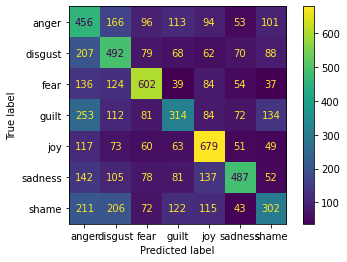

0.44332091538052154
(0.4520487990045208, 0.44236370246048357, 0.44125946041791025, None)


In [132]:
clf = svm.SVC(kernel='poly', decision_function_shape='ovr',)
y_pred = cross_val_predict(clf, X, y, cv=10)
ConfusionMatrixDisplay.from_predictions(y, y_pred)
plt.show()
print(accuracy_score(y, y_pred))
print(precision_recall_fscore_support(y, y_pred, average='macro'))

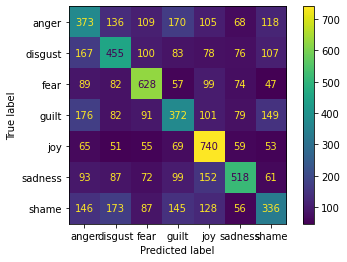

0.45529536987759445
(0.45102057550329216, 0.45436754223182707, 0.45028599118634566, None)


In [133]:
clf = svm.SVC(kernel='rbf', decision_function_shape='ovr')
y_pred = cross_val_predict(clf, X, y, cv=10)
ConfusionMatrixDisplay.from_predictions(y, y_pred)
plt.show()
print(accuracy_score(y, y_pred))
print(precision_recall_fscore_support(y, y_pred, average='macro'))

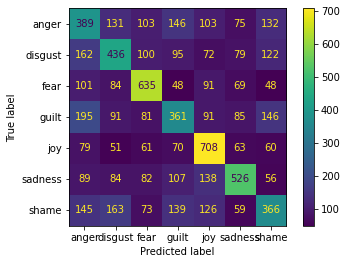

0.45516232038318255
(0.45203456224134186, 0.4542439967212383, 0.4515655705691174, None)


In [134]:
clf = svm.SVC(kernel='linear', decision_function_shape='ovr')
y_pred = cross_val_predict(clf, X, y, cv=10)
ConfusionMatrixDisplay.from_predictions(y, y_pred)
plt.show()
print(accuracy_score(y, y_pred))
print(precision_recall_fscore_support(y, y_pred, average='macro'))